<!-- Imports and Reading Data -->

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [ ]:
df=pd.read_csv('coaster_db.csv')

<!-- Data Understanding -->

<!-- Dataframe Shape
dtypes
describe -->


In [ ]:
df.shape


(1087, 56)

In [ ]:
df.head(10)

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
5,Cannon Coaster,Coney Island,Removed,George Francis Meyer,1902,40.5750,-73.9800,Wood,1902-01-01,NaN,NaN,0,NaN
6,Leap-The-Dips,Lakemont Park,Operating,Federal Construction Company,1902,NaN,NaN,Wood,1902-01-01,10.0,NaN,0,NaN
7,Figure Eight (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1904,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
8,Drop the Dip,Coney Island,Removed,Arthur Jarvis,1907,40.5744,-73.9786,Other,1907-06-06,NaN,NaN,0,NaN
9,Scenic Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1907,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN


In [ ]:
df.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph',
       'height_ft', 'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [ ]:
df.dtypes

,0
coaster_name,object
Location,object
Status,object
Manufacturer,object
year_introduced,int64
latitude,float64
longitude,float64
Type_Main,object
opening_date_clean,object
speed_mph,float64


In [ ]:
df.describe()

,year_introduced,latitude,longitude,speed_mph,height_ft,Inversions_clean,Gforce_clean
count,1087.000000,812.000000,812.000000,937.000000,171.000000,1087.000000,362.000000
mean,1994.986201,38.373484,-41.595373,48.617289,101.996491,1.326587,3.824006
std,23.475248,15.516596,72.285227,16.678031,67.329092,2.030854,0.989998
min,1884.000000,-48.261700,-123.035700,5.000000,13.100000,0.000000,0.800000
25%,1989.000000,35.031050,-84.552200,37.300000,51.800000,0.000000,3.400000
50%,2000.000000,40.289800,-76.653600,49.700000,91.200000,0.000000,4.000000
75%,2010.000000,44.799600,2.778100,58.000000,131.200000,2.000000,4.500000
max,2022.000000,63.230900,153.426500,149.100000,377.300000,14.000000,12.000000


In [ ]:
df.head()

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


<!-- Data Preparation -->

<!-- Dropping irrelevant columns and rows
Identifying Duplicated columns
Renaming columns
Feature Creation -->

In [ ]:
# To remove unnecessary columns
df=df[['coaster_name',
    # 'Length', 'Speed',
    'Location', 'Status',
    # 'Opening date',
      #  'Type',
     'Manufacturer',
    #  'Height restriction', 'Model', 'Height',
      #  'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
      #  'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
      #  'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
      #  'Track layout', 'Fastrack available', 'Soft opening date.1',
      #  'Closing date',
    #  'Opened',
    #  'Replaced by', 'Website',
      #  'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
      #  'Single rider line available', 'Restraint Style',
      #  'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean',
    #  'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph',
    #  'height_value', 'height_unit',
    'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [ ]:
# example of dropping one column
# df.drop(['Opening date'], axis=1)

In [ ]:
df.shape

(1087, 13)

In [ ]:
df.dtypes

,0
coaster_name,object
Location,object
Status,object
Manufacturer,object
year_introduced,int64
latitude,float64
longitude,float64
Type_Main,object
opening_date_clean,object
speed_mph,float64


In [ ]:
df['opening_date_clean']=pd.to_datetime(df['opening_date_clean'])


In [ ]:
df.dtypes

,0
coaster_name,object
Location,object
Status,object
Manufacturer,object
year_introduced,int64
latitude,float64
longitude,float64
Type_Main,object
opening_date_clean,object
speed_mph,float64


In [ ]:
# rename columns
df=df[['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph',
       'height_ft', 'Inversions_clean', 'Gforce_clean']].copy()
df.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph',
       'height_ft', 'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [ ]:
df=df.rename(columns={'coaster_name':'Coaster_name',
                  'year_introduced':'Year_introduced',
                  'opening_date_clean':'Opening_date',
                   'speed_mph':'Speed_mph',
                   'height_ft':'Height_ft',
                   'Inversions_clean':'Inversions',
                   'Gforce_clean':'Gforce'})

In [ ]:
df.isna().sum()

,0
coaster_name,0
Location,0
Status,213
Manufacturer,59
year_introduced,0
latitude,275
longitude,275
Type_Main,0
opening_date_clean,250
speed_mph,150


In [ ]:
df.loc[df.duplicated()]

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean


In [ ]:
df.loc[df.duplicated(subset=['Coaster_name'])].head(5)

,Coaster_name,Location,Status,Manufacturer,Year_introduced,latitude,longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaN,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


In [ ]:
# Check an example duplicate
df.query('Coaster_name == "Crystal Beach Cyclone"')

,Coaster_name,Location,Status,Manufacturer,Year_introduced,latitude,longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [ ]:
df.duplicated(subset=['Coaster_name','Location','Opening_date']).sum()

np.int64(97)

In [ ]:
df=df.loc[~df.duplicated(subset=['Coaster_name','Location','Opening_date'])]\
.reset_index(drop=True)

In [ ]:
df.shape

(990, 13)

In [ ]:
#  Feature Understanding
# Univariate analysis

# PLotting Feature Distributions
        # Histogram
        # KDE
        # Boxplot

Text(0, 0.5, 'count')

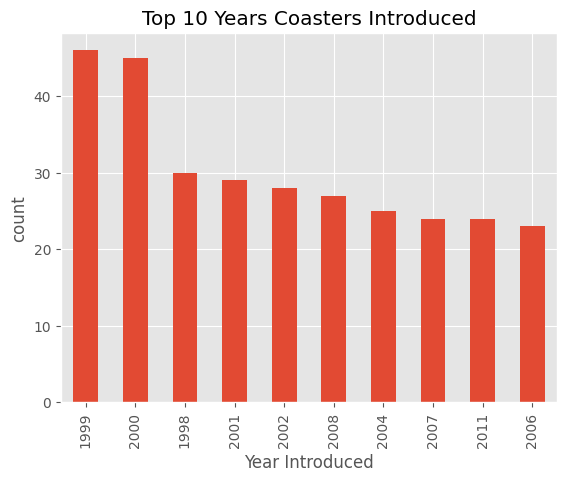

In [ ]:
ax=df['Year_introduced'].value_counts() \
  .head(10)\
  .plot(kind='bar', title='Top 10 Years Coasters Introduced')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('count')

Text(0.5, 0, 'Speed(mph)')

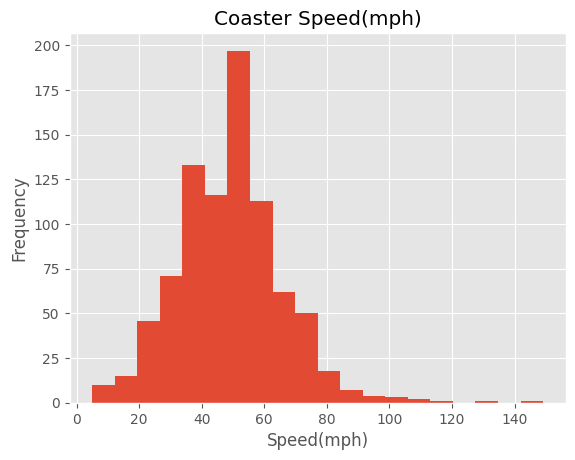

In [ ]:
ax=df['Speed_mph'].plot(kind='hist',bins=20, title='Coaster Speed(mph)')
ax.set_xlabel('Speed(mph)')

Text(0.5, 0, 'Speed(mph)')

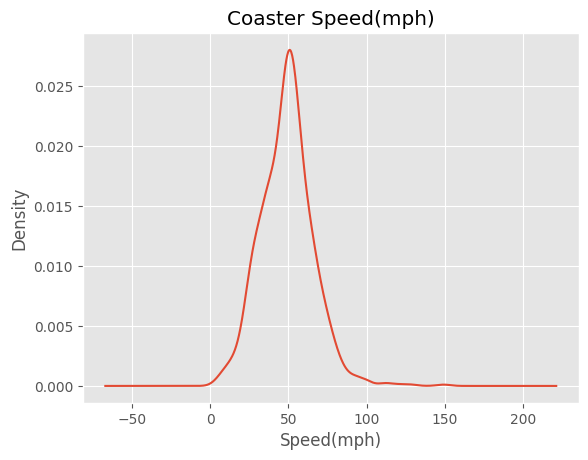

In [ ]:
ax=df['Speed_mph'].plot(kind='kde', title='Coaster Speed(mph)')
ax.set_xlabel('Speed(mph)')

In [ ]:
# Feature Relationships

# Scatterplot
# Heatmap Correlation
# Pairplot
# Groupby Comparisons

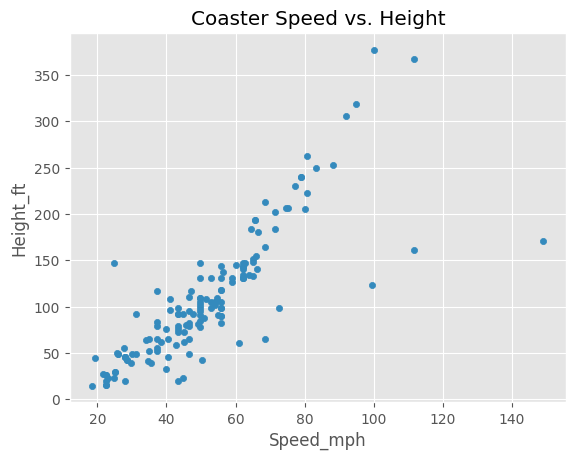

In [ ]:
df.plot(kind='scatter',x='Speed_mph',y='Height_ft',title='Coaster Speed vs. Height')
plt.show()

<Axes: xlabel='Speed_mph', ylabel='Height_ft'>

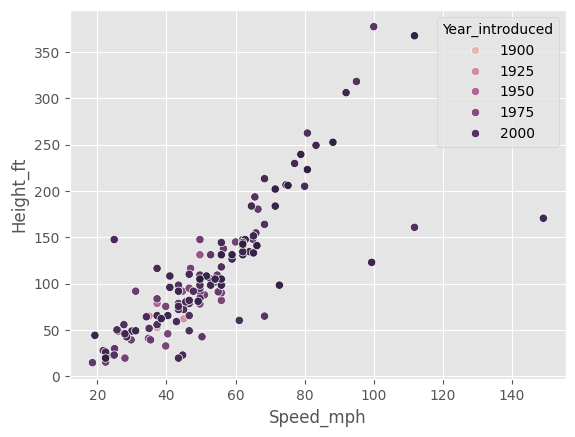

In [ ]:
sns.scatterplot(x='Speed_mph',y='Height_ft',hue='Year_introduced',data=df)

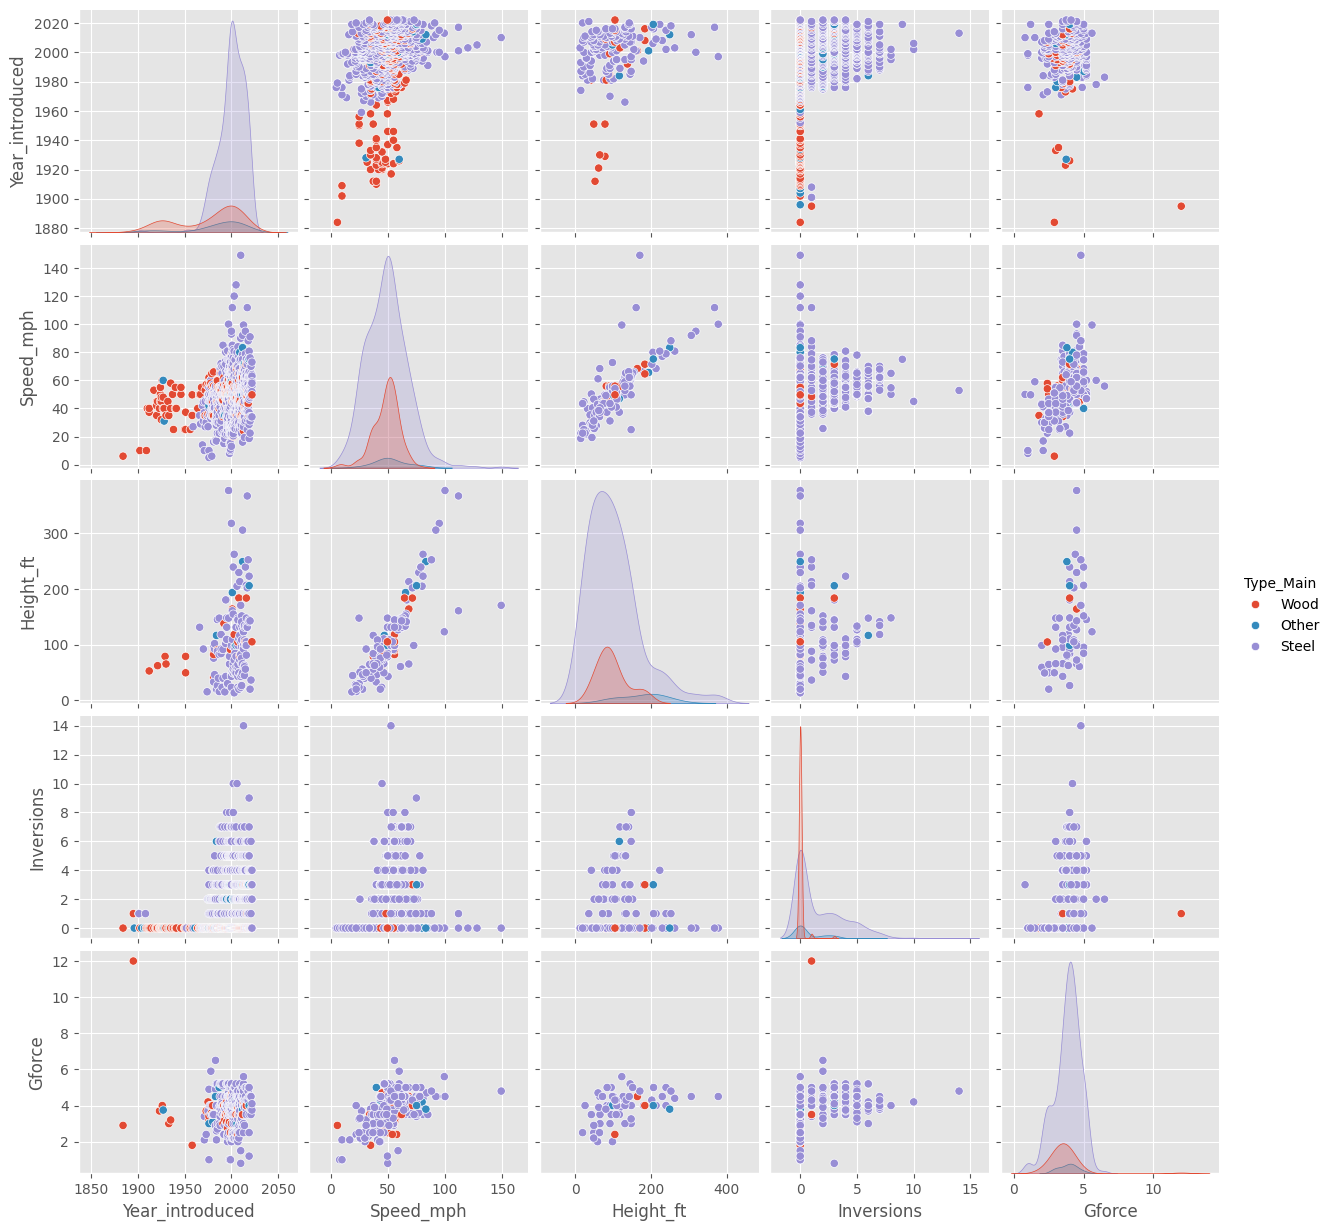

In [ ]:
sns.pairplot(df,vars=['Year_introduced','Speed_mph','Height_ft','Inversions','Gforce'],hue='Type_Main')
plt.show()

In [ ]:
df_corr=df[['Year_introduced','Speed_mph','Height_ft','Inversions','Gforce']].dropna().corr()
df_corr

,Year_introduced,Speed_mph,Height_ft,Inversions,Gforce
Year_introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.275991,1.000000


<Axes: >

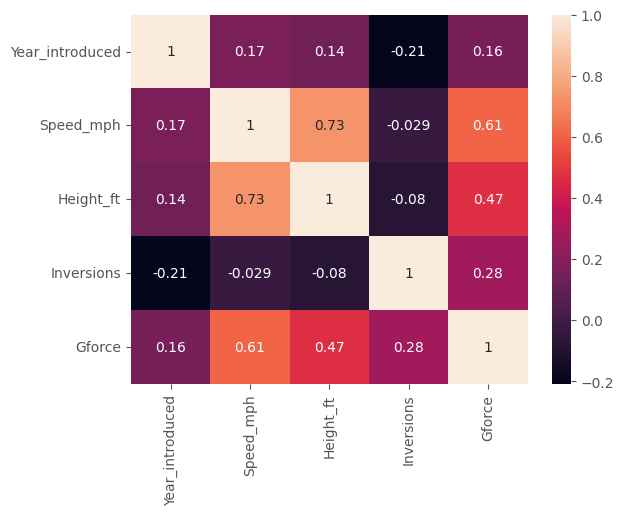

In [ ]:
sns.heatmap(df_corr,annot=True)

In [ ]:
# Answer a question

What are the locations with fastest roller coasters(minimum of 10)?

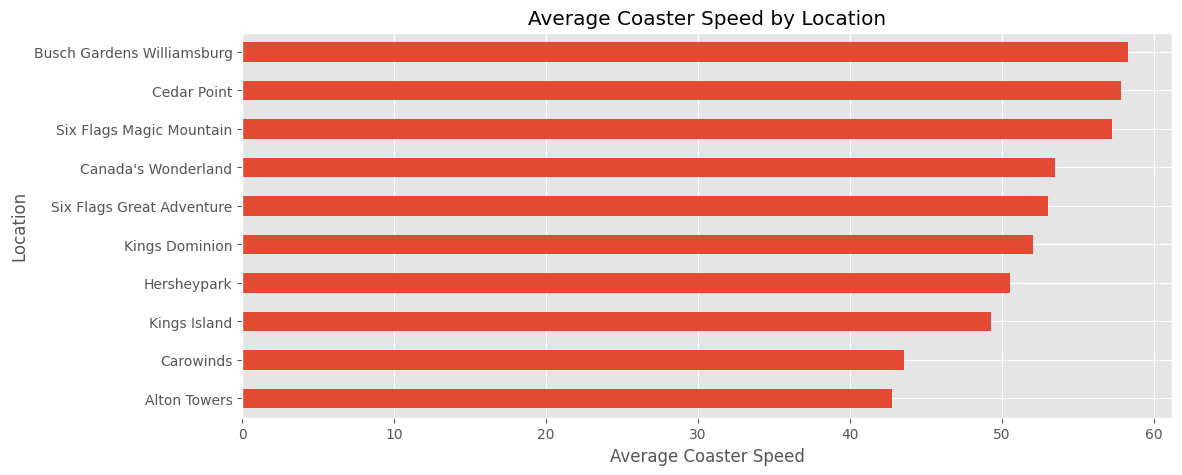

In [ ]:
ax=df.query('Location !="Other"')\
         .groupby('Location')['Speed_mph']\
         .agg(['mean','count'])\
         .query('count>=10')\
         .sort_values('mean')['mean']\
         .plot(kind='barh',figsize=(12,5),title='Average Coaster Speed by Location')
ax.set_xlabel('Average Coaster Speed')
plt.show()

Busch Gardens Williamsburg has the highest average coaster speed.